In [67]:
# %pip install pandas seaborn matplotlib scikit-learn kagglehub

In [68]:
import pandas as pd 
import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import kagglehub
import os

É necessário concatenar o caminho do local do dataset com o arquivo baixado

In [80]:
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
display(os.listdir(path))
df = pd.read_csv(os.path.join(path,r'diabetes_prediction_dataset.csv'))

['diabetes_prediction_dataset.csv']

In [70]:
display(df.head())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [71]:
display(df.describe())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='age', ylabel='Count'>

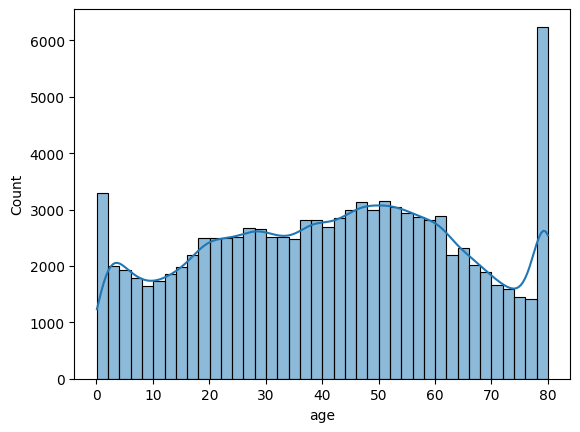

In [72]:
# xticks = np.linspace(np.min(df['age']),np.max(df['age']),30,dtype=int)
sns.histplot(data=df,x='age',bins=40,kde=True)
# plt.xticks(xticks)

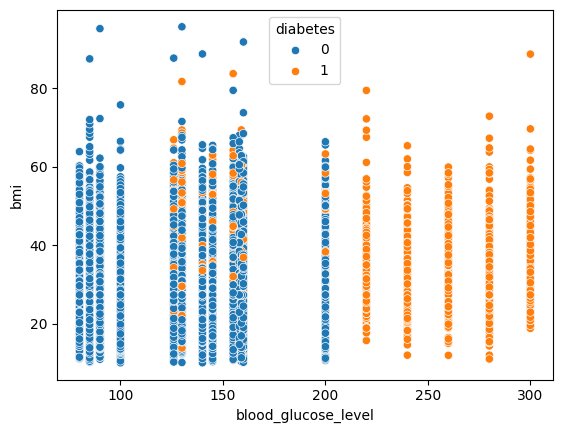

In [73]:
sns.scatterplot(data=df,x="blood_glucose_level",y="bmi",hue='diabetes')
plt.show()

In [74]:
leg = LabelEncoder()
les = LabelEncoder()

df['gender']= leg.fit_transform(df['gender'])
df['smoking_history']= les.fit_transform(df['smoking_history'])

In [75]:
# Print label mapping
label_mapping = dict(zip(les.classes_, les.transform(les.classes_)))
display("Class Mapping:", label_mapping)

'Class Mapping:'

{'No Info': np.int64(0),
 'current': np.int64(1),
 'ever': np.int64(2),
 'former': np.int64(3),
 'never': np.int64(4),
 'not current': np.int64(5)}

In [76]:
# Print label mapping
label_mapping = dict(zip(leg.classes_, leg.transform(leg.classes_)))
display("Class Mapping:", label_mapping)

'Class Mapping:'

{'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}

O *dataset* não possui valores nulos ou faltantes

In [77]:
display(df.describe())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [78]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64


Algumas analises de correlação, claro que não podemos assumir completamente que possuem alguma ligação de fato:
- blood_glucose_level e diabetes
- HbA1c_level e diabetes
- bmi e diabetes

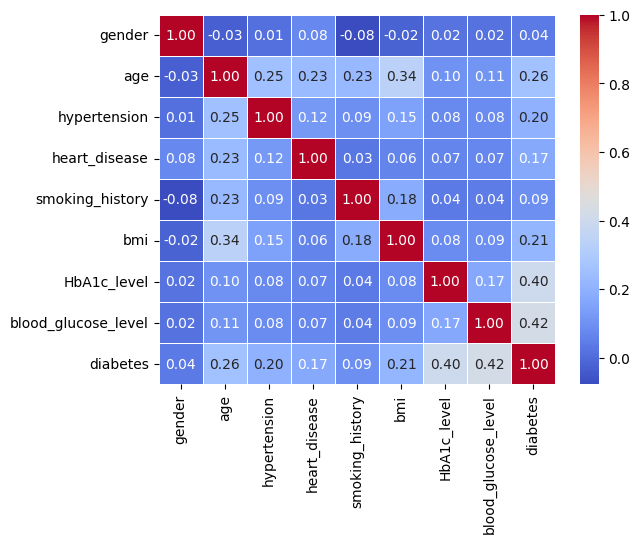

In [79]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()